In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno #this package provides plots for missing data
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('./def_dataset.csv')
df = data.drop(['source', 'garden', 'terrace', 'basement'], axis=1)

In [3]:
# df.info()

In [4]:
profile = ProfileReport(df, title="ImmoEliza data")

In [5]:
df = df[df['price'].notna()]        # remove some records with null values
df = df[df['area'].notna()]         # df = df[df['rooms_number'].notna()]
df = df[df['building_state_agg'].notna()]

In [6]:
# df.info()

In [7]:
profile = ProfileReport(df, title="Cleaned dataset")

In [8]:
# df.corr().price.sort_values(ascending=False)

In [9]:
print("Mean price: " ,df['price'].mean())
print("Median price: " ,df['price'].median())
print("Max price: " ,df['price'].max())
print("Min price: " ,df['price'].min())

Mean price:  413114.61691589677
Median price:  299000.0
Max price:  8750000
Min price:  10000


In [10]:
#separate the dataset into houses and apartments
df_houses = df[df['house_is'] == True]
print("Mean house prices: " ,df_houses['price'].mean())
print("Median house prices: " ,df_houses['price'].median())
df_apartments = df[df['house_is'] == False]
print("Mean apartment prices: " ,df_apartments['price'].mean())
print("Median apartment prices: " ,df_apartments['price'].median())

Mean house prices:  431139.11017361673
Median house prices:  325000.0
Mean apartment prices:  387495.3936808118
Median apartment prices:  276750.0


[Text(0.5, 0, 'house_is'),
 Text(1.5, 0, 'price'),
 Text(2.5, 0, 'postcode'),
 Text(3.5, 0, 'area'),
 Text(4.5, 0, 'rooms_number'),
 Text(5.5, 0, 'equipped_kitchen_has'),
 Text(6.5, 0, 'garden_area'),
 Text(7.5, 0, 'terrace_area'),
 Text(8.5, 0, 'furnished'),
 Text(9.5, 0, 'swimming_pool_has'),
 Text(10.5, 0, 'land_surface'),
 Text(11.5, 0, 'open_fire'),
 Text(12.5, 0, 'longitude'),
 Text(13.5, 0, 'latitude')]

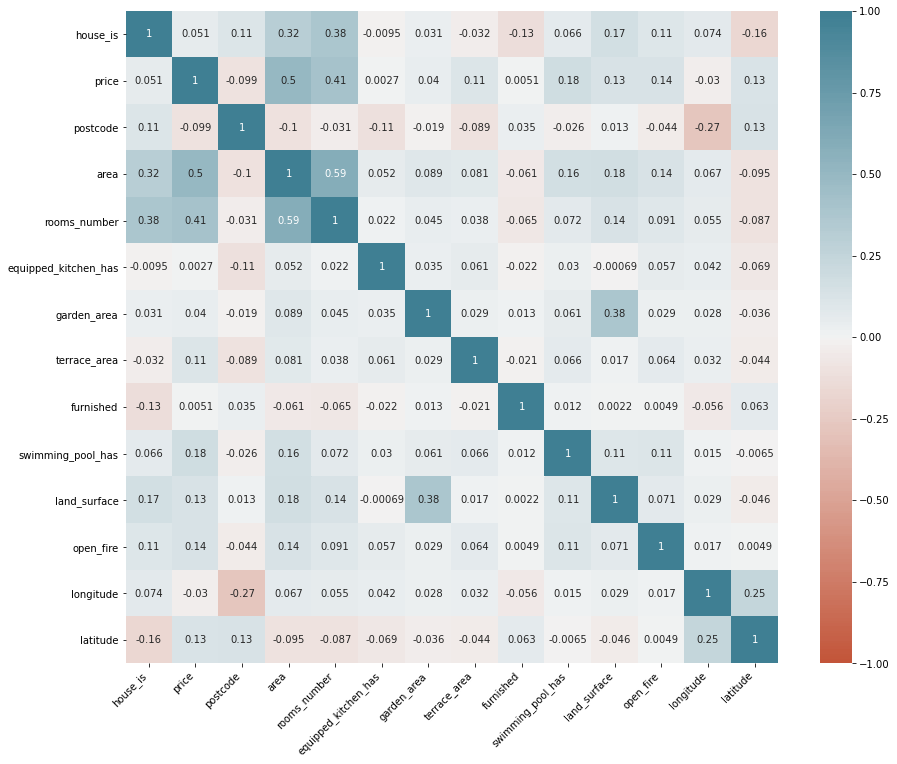

In [11]:
plt.figure(figsize=(15,12))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [12]:
#df['price'].describe()

In [13]:
# df.hist(figsize=(20,15));

In [14]:
# df.columns

In [15]:
features = ['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude']
numfeat = ['postcode', 'area', 'price', 'rooms_number', 'land_surface']
catfeat = ['property_subtype', 'swimming_pool_has', 'building_state_agg', 'open_fire']

In [16]:
# df['city'].value_counts()

swimming_pool_has
False    10292
True       207
Name: swimming_pool_has, dtype: int64


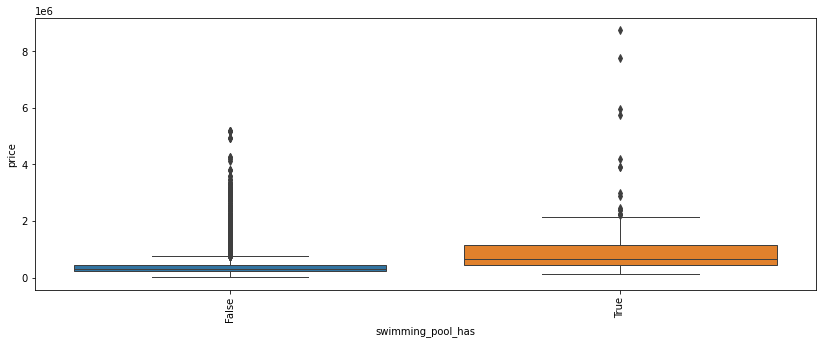

building_state_agg
AS_NEW            4270
GOOD              3778
TO_RENOVATE       1749
JUST_RENOVATED     643
TO_RESTORE          59
Name: building_state_agg, dtype: int64


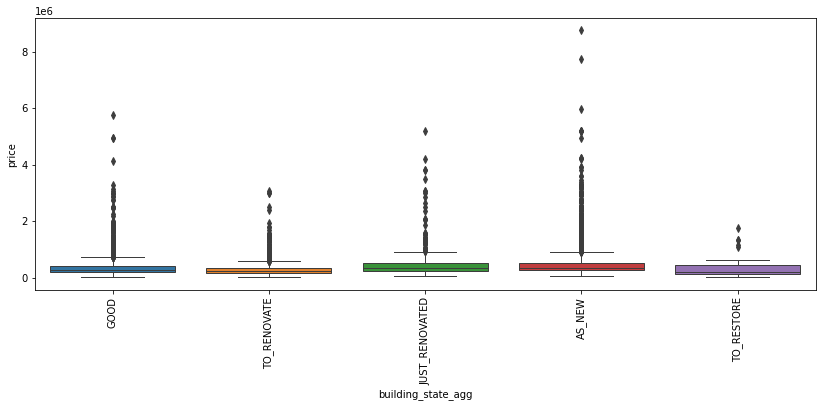

open_fire
False    9986
True      513
Name: open_fire, dtype: int64


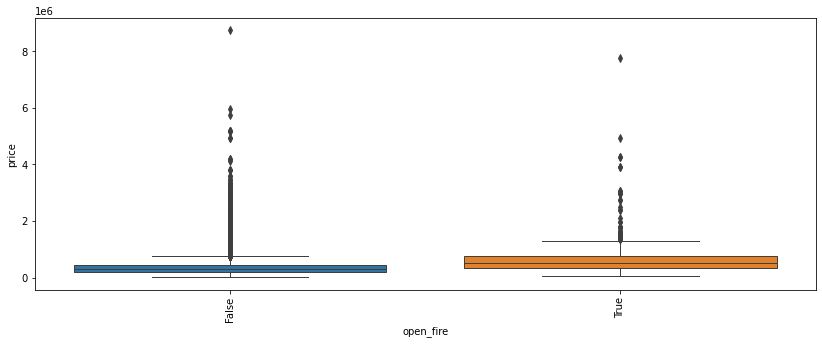

In [17]:
#Let's see what type of categorical data we have
#catfeat = ['city', 'region']
catdata = df[catfeat]
cat_values={}
for n in catfeat[1:len(catfeat)]:
    print(n)
    print(pd.value_counts(catdata[n]))
    ax = plt.subplots(figsize=(14, 5))
    plt.xticks(rotation='vertical')
    ax=sns.boxplot(x=n, y="price", data=df, linewidth=1)
    plt.show()

In [18]:
def price_area(df1):    
    df1['coeff'] = np.where(df1['land_surface'] + df1['garden_area'] < 250, 2, np.where(df1['land_surface'] + df1['garden_area'] < 1000, 4, np.where(df1['land_surface'] + df1['garden_area'] < 5000, 8, np.where(df1['land_surface'] + df1['garden_area'] < 10000, 12, 16))))        
    df1['divisor'] = df1['area'] + df1['terrace_area'] + df1['garden_area'] / df1['coeff'] + df1['land_surface']/df1['coeff']
    df1['price_area'] = df1['price']/df1['divisor']
    f = ['open_fire', 'swimming_pool_has', 'furnished', 'equipped_kitchen_has']
    c = [-5000, -15000, -10000, -5000]
    for i in range(len(f)):
        df1['price_area'] += np.where(df1[f[i]] == True, c[i]/df1['divisor'], 0)
    factors = ['AS_NEW', 'JUST_RENOVATED', 'TO_RENOVATE', 'TO_RESTORE']
    rate = [-600, -300, 300, 600]
    for i in range(len(factors)):
        df1['price_area'] += np.where(df1['building_state_agg'] == factors[i],
                              (rate[i]*(df1['area'] + df1['terrace_area'])/df1['divisor']), 0)
    return df1

In [19]:
df = price_area(df)
df = df[df['price_area']<20000]     # outliers for price_area

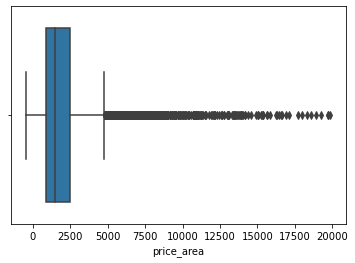

In [20]:
sns.boxplot(df['price_area']);

In [21]:
#separate the dataset into houses and apartments
df_houses = df[df['house_is'] == True]
print("Max house price per area: " ,df_houses['price_area'].max())
print("Median house price per area: " ,df_houses['price_area'].median())
df_apartments = df[df['house_is'] == False]
print("Max apartment price per area: " ,df_apartments['price_area'].max())
print("Median apartment price per area: " ,df_apartments['price_area'].median())

Max house price per area:  19866.666666666664
Median house price per area:  993.3466135458168
Max apartment price per area:  19241.666666666664
Median apartment price per area:  2333.3333333333335


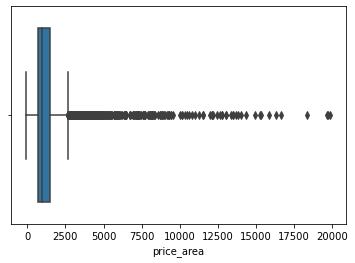

In [22]:
sns.boxplot(df_houses['price_area']);

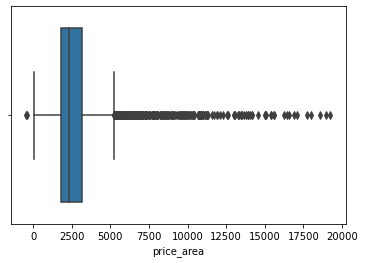

In [23]:
sns.boxplot(df_apartments['price_area']);

In [24]:
#give studio apartments one bedrooms
# df['rooms_number'] = np.where(df['rooms_number'] > 1, df['rooms_number'], 1)
# df.shape          # I think if we add one room we should add one to everyone 

In [25]:
# filter out datapoints less than 1,000euros per area it is 3000+ records 500€=773records
# and 10,000euros per area, room_number more than 10,area more than 500sqm 
df2 = df[(df['price_area'] > 500) & (df['price_area']<5500) & (df['rooms_number']<6)   & (df['area']<500)]
df2.shape

(8798, 19)

<AxesSubplot:xlabel='price_area'>

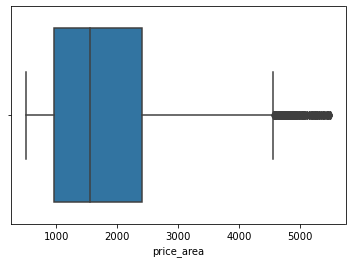

In [26]:
sns.boxplot(df2['price_area'])

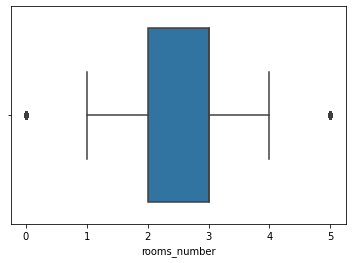

In [27]:
sns.boxplot(df2['rooms_number']);

<AxesSubplot:xlabel='area'>

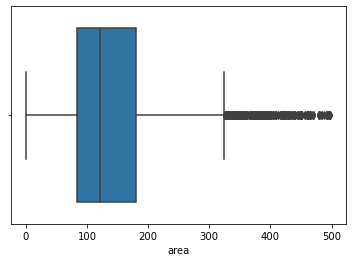

In [28]:
sns.boxplot(df2['area'])

In [29]:
# df2.isnull().sum()

In [30]:
#drop null values for final df
final_df = df2.dropna()
final_df.shape

(8798, 19)

In [31]:
# final_df.isnull().sum()

## Linear Regression model

In [32]:
#import sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score


In [33]:
# final_df.corr().price.sort_values(ascending=False)
final_df.columns

Index(['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude', 'coeff', 'divisor', 'price_area'],
      dtype='object')

In [34]:
#prepare x and y variables for the model
x = final_df.drop(['price','price_area','house_is', 'divisor', 'coeff', 'postcode'], axis=1)    
# , 'land_surface', 'postcode'
y = final_df['price']                   # 'price_area' should help us a lot
print(x.shape)      # 'house_is' , 'postcode', 'rooms_number', 'coeff', 'divisor'
print(y.shape)                          
x.columns

(8798, 13)
(8798,)


Index(['property_subtype', 'area', 'rooms_number', 'equipped_kitchen_has',
       'garden_area', 'terrace_area', 'furnished', 'swimming_pool_has',
       'land_surface', 'building_state_agg', 'open_fire', 'longitude',
       'latitude'],
      dtype='object')

In [35]:
#transform columns
column_trans = make_column_transformer((OneHotEncoder(), ['swimming_pool_has','open_fire', 'building_state_agg', 'property_subtype']), remainder='passthrough')
X = column_trans.fit_transform(x)
X.shape

(8798, 39)

In [36]:
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
#create and apply linear regression model
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('Score train:', linreg.score(X_train,y_train))
print('Score test:', linreg.score(X_test,y_test))

Score train: 0.5014890965526964
Score test: 0.47437455125965977


In [38]:
#plot the model
cross_val_score(linreg, X_train, y_train).mean()
cross_val_score(linreg, X_test, y_test ,cv=25).mean()
cross_val_score(linreg, X_test, y_test).mean()

-100559279154485.0

## Linear Regression for Houses

In [39]:
df_houses = final_df[final_df['house_is'] == True]
df_houses.corr().price.sort_values(ascending=False)
df_houses.columns

Index(['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude', 'coeff', 'divisor', 'price_area'],
      dtype='object')

In [40]:
#prepare x and y variables for the model
x_houses = df_houses.drop(['price'], axis=1)
y_houses = df_houses['price']
print(x_houses.shape)
print(y_houses.shape)

(4821, 18)
(4821,)


In [41]:
#transform columns
column_trans = make_column_transformer((OneHotEncoder(), ['house_is', 'building_state_agg', 'property_subtype']), remainder='passthrough')
X= column_trans.fit_transform(x_houses)


In [42]:
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y_houses, test_size = 0.3, random_state = 42)

In [43]:
#create and apply linear regression model
linreg_houses = LinearRegression().fit(X_train, y_train)
y_pred = linreg_houses.predict(X_test)
print('score Train:', linreg_houses.score(X_train,y_train))
print('score Test:', linreg_houses.score(X_test,y_test)) #plot the model
print('C-V Score Train: ', cross_val_score(linreg_houses, X_train, y_train).mean())
print('C-V Score Test: ', cross_val_score(linreg_houses, X_test, y_test).mean())

score Train: 0.7776603473516668
score Test: 0.7486255078317336
C-V Score Train:  0.7696081513482544
C-V Score Test:  0.7339392456744264


## Linear Regression for Apartments

In [44]:
df_apt = final_df[final_df['house_is'] == False]
df_apt.corr().price.sort_values(ascending=False)
df_apt.columns

Index(['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude', 'coeff', 'divisor', 'price_area'],
      dtype='object')

In [45]:
#prepare x and y variables for the model
x_apt = df_apt.drop(['house_is','price','price_area', 'land_surface','rooms_number', 'swimming_pool_has', 'coeff', 'divisor', 'longitude', 'latitude'], axis=1)
y_apt = df_apt['price']

In [46]:
column_trans = make_column_transformer((OneHotEncoder(), [ 'building_state_agg', 'property_subtype']), remainder='passthrough')
X= column_trans.fit_transform(x_apt)

In [47]:
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y_apt, test_size = 0.3, random_state = 42)

#create and apply linear regression model
linreg_houses = LinearRegression().fit(X_train, y_train)
y_pred = linreg_houses.predict(X_test)
print('score Train:', linreg_houses.score(X_train,y_train))
print('score Test:', linreg_houses.score(X_test,y_test))   
#plot the model
print('C-V Score Train: ', cross_val_score(linreg_houses, X_train, y_train).mean())
print('C-V Score Test: ', cross_val_score(linreg_houses, X_test, y_test).mean())

score Train: 0.6417264053459502
score Test: 0.638099172876314
C-V Score Train:  0.627533320328026
C-V Score Test:  0.6142429113910214


## Polynomial Regression model

In [48]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
print(X_scaled.shape)
print(type(X_scaled))

(2783, 21)
<class 'numpy.ndarray'>


In [49]:
#check the mean and standard deviation of the scaled X values
print('Mean of each scaled variable')
np.mean(X_scaled, axis=0)

Mean of each scaled variable


array([-2.09079370e-16,  1.24426361e-16, -1.59951104e-16,  2.10675091e-16,
        1.03432654e-16, -2.51006945e-16,  2.90301579e-16,  5.31375159e-16,
        1.06661994e-15, -5.76396937e-16, -1.40503252e-16,  1.07252411e-16,
       -1.45230576e-16,  3.35330837e-16,  8.53710842e-18, -6.19139825e-17,
        2.61857849e-16,  6.62703014e-16,  8.32368071e-17, -3.59875024e-16,
       -3.06378470e-17])

In [50]:
#Now, you can see that mean is zero and the standard deviation is 1 for each variable in the X_scaled matrix. Now, our data is ready to run PCA
print('Std of each scaled variable')
np.std(X_scaled, axis=0)

Std of each scaled variable


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [51]:
# Run PCA algorithm to reduce n-dimensional data in the X_scaled matrix into one-dimensional data
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=1000)

X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)
print(type(X_pca))

#check how much of variation retained by the algorithm while running it
print('Variance explained by the principal component: ')
pca.explained_variance_ratio_*100

(2783, 1)
<class 'numpy.ndarray'>
Variance explained by the principal component: 


array([11.2798408])

In [52]:
'''#plot the data
sns.scatterplot(x=X_pca.reshape(-1,1), y=y.reshape(-1,1))
plt.xlabel('Prncipal Component (X_pca)')
plt.ylabel('Price')
#plt.title('97.36% of the Variablility Explained', pad=20)
plt.show()'''

"#plot the data\nsns.scatterplot(x=X_pca.reshape(-1,1), y=y.reshape(-1,1))\nplt.xlabel('Prncipal Component (X_pca)')\nplt.ylabel('Price')\n#plt.title('97.36% of the Variablility Explained', pad=20)\nplt.show()"

In [53]:
#Let’s add polynomial features to our data using Scikit-learn PolynomialFeatures() class
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=15, include_bias=False)

X_poly= poly_features.fit_transform(X_pca)
print(X_poly.shape)
print(type(X_poly))

(2783, 15)
<class 'numpy.ndarray'>


### Running the algorithm
Now, we have transformed our data into polynomial features. So, we can use the LinearRegression() class again to build the model.

In [54]:
#create and apply linear regression model
linreg2 = LinearRegression()
linreg2.fit(X_poly, y_train)
y_pred2 =linreg2.predict(X_poly)
print('score:', linreg2.score(X_poly,y_train))

score: 0.45697874218800794


In [55]:
from sklearn.metrics import r2_score, mean_squared_error
R_squared_2 = r2_score(y_train, y_pred2)
MSE_2 = mean_squared_error(y_train, y_pred2)
RMSE_2 = np.sqrt(MSE_2)
print('R2: ', R_squared_2)
print('RMSE: ', RMSE_2)

R2:  0.45697874218800794
RMSE:  160786.97651391156


In [56]:
'''sns.scatterplot(x=X_pca.reshape(11117,1), y=y_train.reshape(11117, ))
plt.plot(X_pca.reshape(11117,1), y_pred2, color='blue')
plt.xlabel('Principal Component (X_pca)')
plt.ylabel('Price')
plt.title('Best fitting', pad=20)'''

"sns.scatterplot(x=X_pca.reshape(11117,1), y=y_train.reshape(11117, ))\nplt.plot(X_pca.reshape(11117,1), y_pred2, color='blue')\nplt.xlabel('Principal Component (X_pca)')\nplt.ylabel('Price')\nplt.title('Best fitting', pad=20)"

In [57]:
final_df['status']=np.where(final_df['building_state_agg'] == 'AS_NEW',(300*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'JUST_RENOVATED',(150*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'TO_RENOVATE',(-150*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'TO_RESTORE',(-300*(final_df['area']+ final_df['terrace_area'])),0))))
f = ['open_fire', 'swimming_pool_has', 'furnished', 'equipped_kitchen_has']
c = [5000, 25000, 20000, 10000]
for i in range(len(f)):
    final_df['status'] += np.where(final_df[f[i]] == True, c[i], 0)
final_df.columns

Index(['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude', 'coeff', 'divisor', 'price_area',
       'status'],
      dtype='object')

In [58]:
len(final_df[final_df['building_state_agg'] =='AS_NEW'])

3598

In [59]:
X = final_df.drop(['price','price_area', 'coeff', 'divisor'], axis=1)   
X = pd.get_dummies(X, prefix=['col1', 'col2'])
y = final_df['price']                   # 'price_area' may be help us a lot
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [60]:
from sklearn import ensemble
rfr = ensemble.RandomForestRegressor(max_depth=20, random_state=0)
rfr.fit(x_train, y_train) 
print(rfr.score(x_test, y_test))

0.8034490018984212


In [61]:
rfr = ensemble.ExtraTreesRegressor(n_estimators=400, random_state=5)
rfr.fit(x_train, y_train) 
print(rfr.score(x_test, y_test))

0.7648089533854097


In [62]:
rfr = ensemble.VotingRegressor([('lr', LinearRegression()), ('rf', ensemble.RandomForestRegressor(n_estimators=200, random_state=0))])
rfr.fit(x_train, y_train) 
print(rfr.score(x_test, y_test))

0.7243676524986052


In [63]:
X['status'].mean()

24688.866787906343

In [64]:
clf = ensemble.GradientBoostingRegressor(
    n_estimators=400, max_depth=5, min_samples_split=7, learning_rate=0.1, loss='ls')
clf.fit(x_train, y_train) 
print(clf.score(x_test, y_test))

0.832244301331187


In [65]:
final_df = final_df[final_df['longitude']>0]
final_df = final_df[final_df['latitude']>49]
final_df.columns

Index(['house_is', 'property_subtype', 'price', 'postcode', 'area',
       'rooms_number', 'equipped_kitchen_has', 'garden_area', 'terrace_area',
       'furnished', 'swimming_pool_has', 'land_surface', 'building_state_agg',
       'open_fire', 'longitude', 'latitude', 'coeff', 'divisor', 'price_area',
       'status'],
      dtype='object')

In [66]:
from plotly.validators.scatter.marker import SymbolValidator
raw_symbols = SymbolValidator().values
namestems = []
namevariants = []
# symbol=[symb[i] for i,v in enumerate(final_df['building_state_agg'].unique())]
symbols = []
for i in range(0,len(final_df['building_state_agg'])):
    # name = raw_symbols[i+2]
    symbols.append(raw_symbols[i%len(raw_symbols)])
    # namestems.append(name.replace("-open", "").replace("-dot", ""))
    # namevariants.append(name[len(namestems[-1]):])
# symbols

In [70]:
final_df['status']=np.where(final_df['building_state_agg'] == 'AS_NEW',(300*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'JUST_RENOVATED',(150*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'TO_RENOVATE',(-150*(final_df['area']+ final_df['terrace_area'])),np.where(final_df['building_state_agg'] == 'TO_RESTORE',(-300*(final_df['area']+ final_df['terrace_area'])),0))))
colors=['green','blue','grey','orange','red']
color = ['green' if c=='AS_NEW' else ('blue' if c=='JUST_RENOVATED' else ('orange' if c=='TO_RENOVATE'  else ('orange' if c=='TO_RESTORE' else 'grey'))) for c in final_df['building_state_agg']]
len(color)

8795

In [76]:
import plotly
import plotly.graph_objs as go
color = ['green' if c=='AS_NEW' else ('blue' if c=='JUST_RENOVATED' else ('orange' if c=='TO_RENOVATE'  else ('orange' if c=='TO_RESTORE' else 'grey'))) for c in final_df['building_state_agg']]
fig1 = go.Scatter3d(x=final_df['longitude'],y=final_df['latitude'],z=final_df['price'],mode='markers',marker=dict(
        size=(final_df['house_is']+4)*2,
        color=color,    
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ))
    #,marker_symbol=symbols
mylayout = go.Layout(xaxis=dict(title="curb-weight"),yaxis=dict( title="price"))
plotly.offline.plot({"data": [fig1],"layout": mylayout},auto_open=True)

'temp-plot.html'

In [ ]:
# sns.pairplot(final_df)

In [ ]:
final_df = final_df[final_df['longitude']>0]
final_df = final_df[final_df['latitude']>49]
final_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()